<a href="https://colab.research.google.com/github/Dpipeto/Regresion_Logistica/blob/main/Regresion_Logistica_Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   EmployeeID  Age  YearsAtCompany  PerformanceScore        Salary
0        2620   27               6          3.406346  139071.90680
1        9240   54              30          1.480111   64523.56010
2        7153   38              23          3.537315   62316.74147
3        9178   38              36          4.571588  104125.41890
4        9452   33               3          4.043143  123153.69970
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        2000 non-null   int64  
 1   Age               2000 non-null   int64  
 2   YearsAtCompany    2000 non-null   int64  
 3   PerformanceScore  2000 non-null   float64
 4   Salary            2000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 78.2 KB
None
        EmployeeID          Age  YearsAtCompany  PerformanceScore  \
count  2000.000000  2000.000000     20

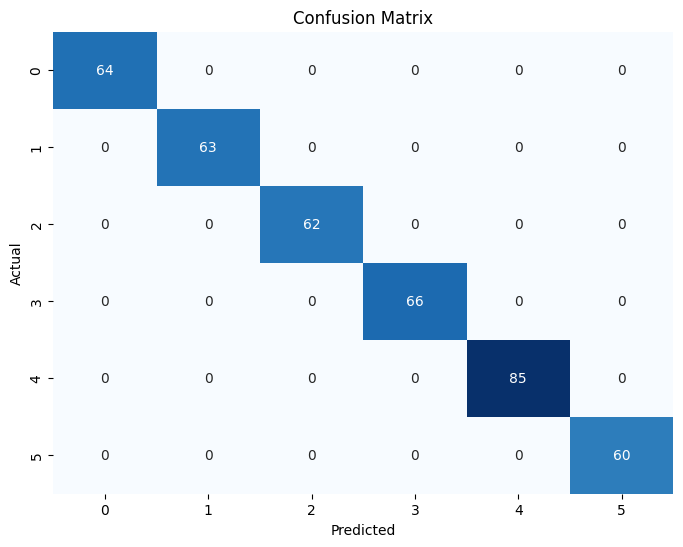

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        60

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Exactitud del modelo: 100.00%


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data = pd.read_csv('employee_performance(in).csv')

print(data.head())
print(data.info())
print(data.describe())

data['PerformanceScore'] =  pd.qcut(data['PerformanceScore'], q=6, labels=[0, 1, 2, 3, 4, 5])

x = data[['Age','YearsAtCompany','PerformanceScore','Salary']]
y = data['PerformanceScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logistic_model = LogisticRegression()

logistic_model.fit(x_train_scaled, y_train)

y_pred = logistic_model.predict(x_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap ='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')